In [1]:
import os
print(os.listdir("../BlackFridayAnalysisProject"))
from Libraries import *
from Functions import *

['.ipynb_checkpoints', 'Analyze.ipynb', 'Analyze.py', 'BlackFriday.csv', 'Functions.py', 'Libraries.py', '__init__.py', '__pycache__']


In [ ]:
df.info()

In [4]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [ ]:
## to check which columns have null values.
df.isna().any()

In [ ]:
sns.countplot(df['Gender'])

In [ ]:
print("Всего совершенно покупок: ", df['User_ID'].count())
print(df.groupby(['Gender'])['User_ID'].count())

In [53]:
Q_Customer = df['User_ID'].drop_duplicates()
print("Всего покупателей: ", Q_Customer.count())

Всего покупателей:  5891


In [54]:
#Количество покупателей, мужчин и женщин
print(Q_Customer[df.Gender=='F'].count()) 
print(Q_Customer[df.Gender=='M'].count())

1666
4225


In [ ]:
#Среднее число покупок для мужчины и женщины 
print(df.groupby(['Gender'])['Product_ID'].count())
AverQuintityF = 132197/1666
AverQuintityM = 405380/4225
print("Среднее количество покупок для женщины:", AverQuintityF)
print("Среднее количество покупок для мужчины:", AverQuintityM)

In [ ]:
#Средняя сумма покупки для мужчины и для женщины
print(df.groupby(['Gender'])['Purchase'].mean())

Общая сумма покупок =  5017668378
Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64


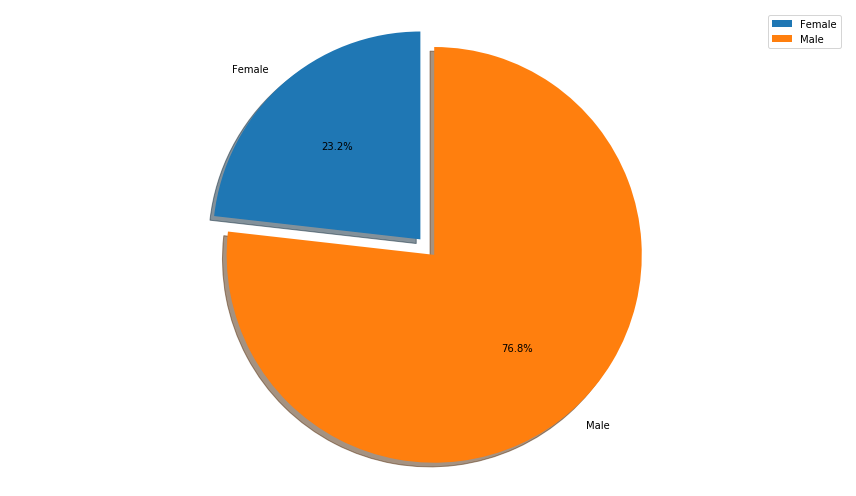

In [2]:
#Сумма покупок для женщины и мужчин
print('Общая сумма покупок = ', df['Purchase'].sum())
Sum_Purchase = df.groupby(['Gender'])['Purchase'].sum()
draw_pie_diagram_advanced(Sum_Purchase, ['Female', 'Male'], [0.1, 0])

In [57]:
#Женатые и нежинатые число покупателей
print('Not married =', Q_Customer[df.Marital_Status==0].count())
print('Married =', Q_Customer[df.Marital_Status==1].count())

Not married = 3417
Married = 2474


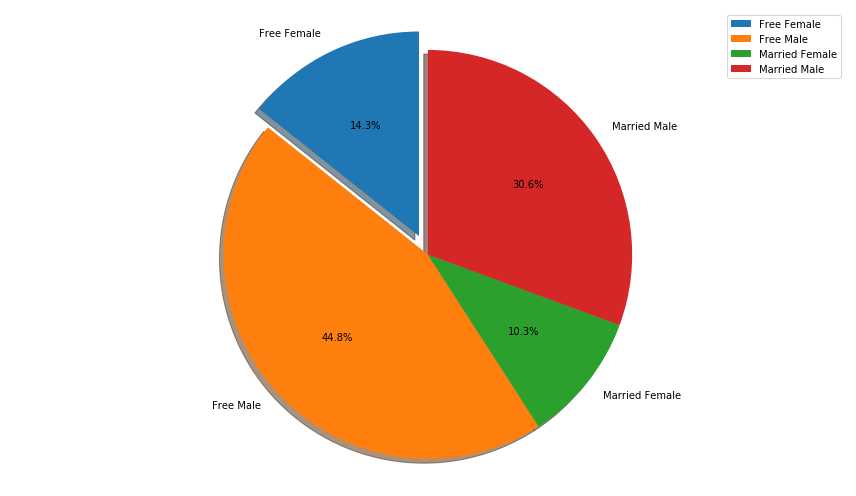

In [58]:
#Число покупок женатых и неженатых
Purchase_Marital=df.groupby(['Marital_Status', 'Gender'])['Purchase'].count()
draw_pie_diagram_advanced(Purchase_Marital, ['Free Female', 'Free Male', 'Married Female', 'Married Male'], (0.1, 0, 0, 0))

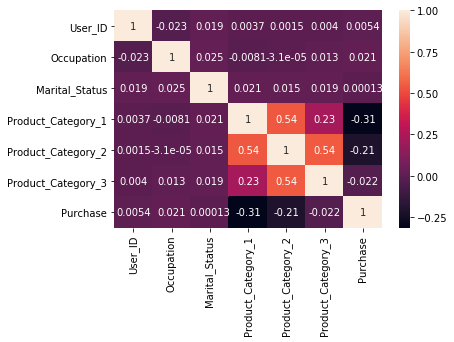

In [8]:
sns.heatmap(
    df.corr(),
    annot=True
)

In [59]:
#Число покупок женатых и неженатых
df.groupby(['Marital_Status', 'Gender'])['Purchase'].mean()

Marital_Status  Gender
0               F         8753.809299
                M         9518.540223
1               F         8887.751553
                M         9484.617891
Name: Purchase, dtype: float64

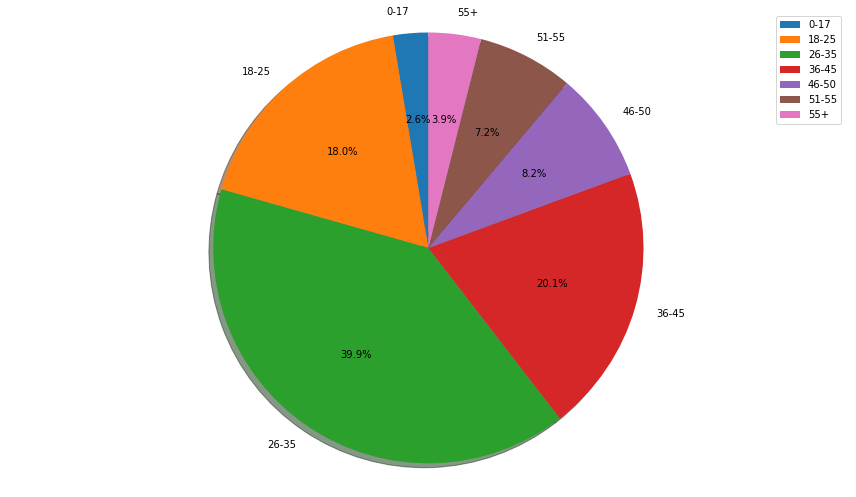

In [61]:
Purchase_Age=df.groupby(['Age'])['Purchase'].sum()
draw_pie_diagram_advanced(Purchase_Age, ['0-17', '18-25', '26-35', '36-45', '46-50','51-55', '55+',])

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64


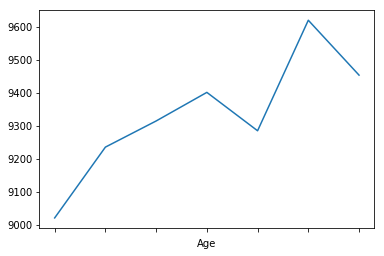

In [65]:
Age_mean_purchase = df.groupby(['Age'])['Purchase'].mean()
print(Age_mean_purchase)
Age_mean_purchase.plot()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
Name: User_ID, dtype: int64


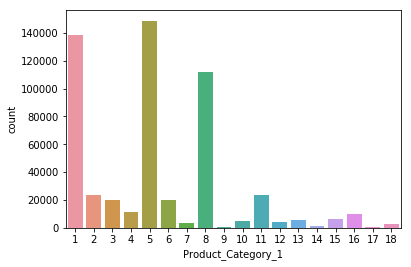

In [66]:
Product_Category_Numbers = df.groupby(['Product_Category_1'])['User_ID'].count()
print(Product_Category_Numbers)
sns.countplot(df['Product_Category_1'])

Product_Category_1  Age  
1                   0-17      3524
                    18-25    26627
                    26-35    57398
                    36-45    27215
                    46-50    10292
                    51-55     8950
                    55+       4347
2                   0-17       789
                    18-25     4348
                    26-35     8784
                    36-45     4856
                    46-50     2068
                    51-55     1763
                    55+        891
3                   0-17      1180
                    18-25     4633
                    26-35     7524
                    36-45     3785
                    46-50     1343
                    51-55      908
                    55+        476
4                   0-17       744
                    18-25     2436
                    26-35     4124
                    36-45     2311
                    46-50      971
                    51-55      666
                    55+      

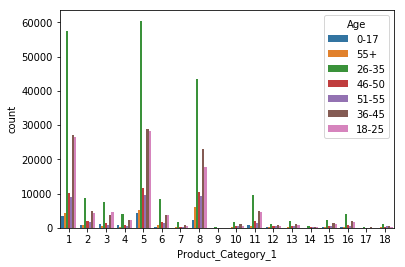

In [67]:
Product_Category_Age=df.groupby(['Product_Category_1', 'Age'])['User_ID'].count()
print(Product_Category_Age)
sns.countplot(df['Product_Category_1'], hue = df['Age'])

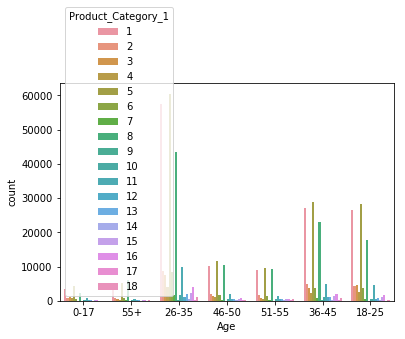

In [9]:
sns.countplot(df['Age'], hue = df['Product_Category_1'])

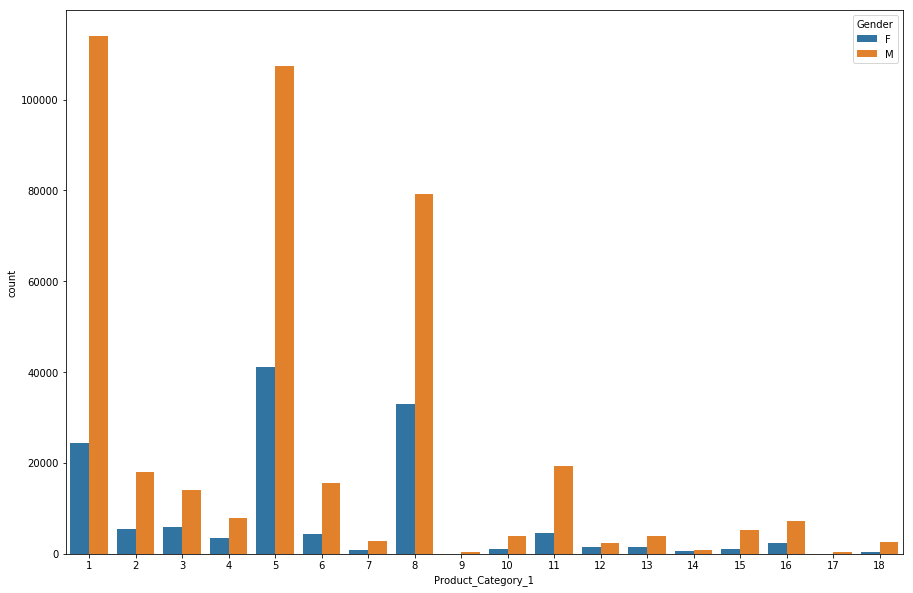

In [47]:
f,ax = plt.subplots(figsize=(15,10))
sns.countplot(df['Product_Category_1'], hue = df['Gender'])

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64


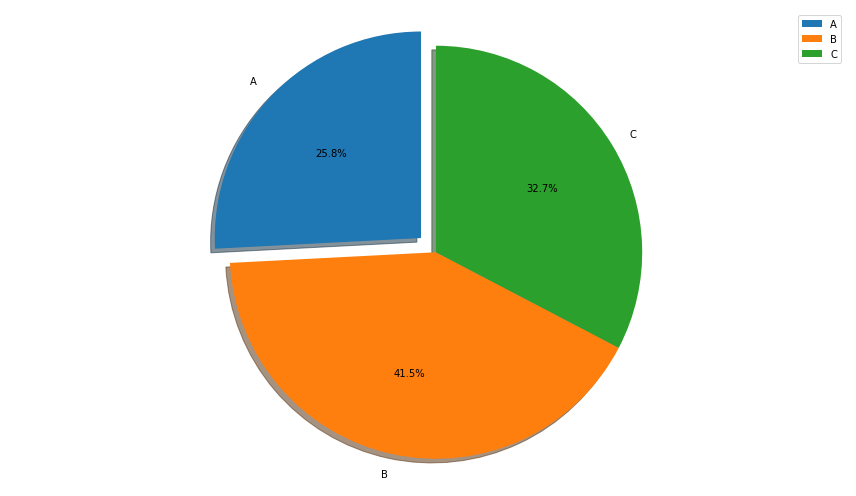

In [3]:
Purchase_City=df.groupby(['City_Category'])['Purchase'].sum()
draw_pie_diagram_advanced(Purchase_City, ['A', 'B', 'C'], [0.1, 0, 0])

Occupation
0     68120
1     45971
2     25845
3     17366
4     70862
5     11985
6     19822
7     57806
8      1524
9      6153
10    12623
11    11338
12    30423
13     7548
14    26712
15    11812
16    24790
17    39090
18     6525
19     8352
20    32910
Name: Purchase, dtype: int64


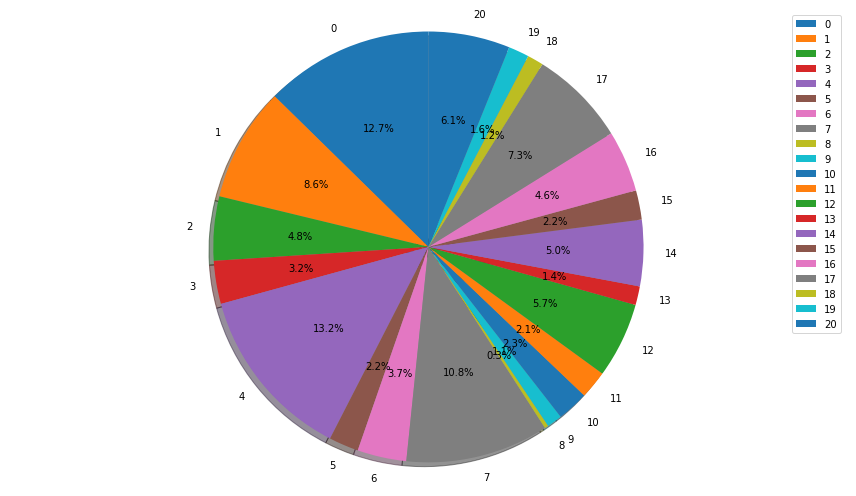

In [15]:
TratOcu=df.groupby(['Occupation'])['Purchase'].count()
draw_pie_diagram_advanced(TratOcu, range(21))

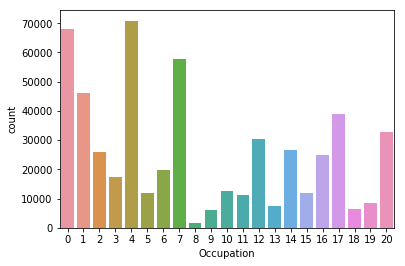

In [16]:
sns.countplot(df['Occupation'])

Product_Category_1  Gender
1                   F          24477841398
                    M         114289124551
2                   F           5590371931
                    M          17979220117
3                   F           5891751018
                    M          14015650725
4                   F           3583205755
                    M           8018619495
5                   F          41324905343
                    M         107710591137
6                   F           4488815881
                    M          15736000108
7                   F            930853659
                    M           2748035877
8                   F          33048213273
                    M          79419181096
9                   F             70219899
                    M            335039063
10                  F           1141601635
                    M           3905752065
11                  F           4673561045
                    M          19357919615
12                  F      

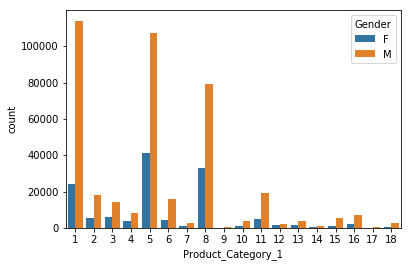

In [17]:
catpr=df.groupby(['Product_Category_1', 'Gender'])['User_ID'].sum()
print(catpr)
sns.countplot(df['Product_Category_1'], hue = df['Gender'])

In [ ]:
catci=df.groupby(['Product_Category_1', 'Stay_In_Current_City_Years'])['User_ID'].sum()
print(catci)
sns.countplot(df['Product_Category_1'], hue = df['Stay_In_Current_City_Years'])

Stay_In_Current_City_Years
0      72725
1     189192
2      99459
3      93312
4+     82889
Name: User_ID, dtype: int64


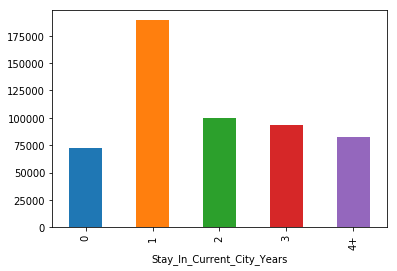

In [24]:
catco=df.groupby(['Stay_In_Current_City_Years'])['User_ID'].count()
print(catco)
#sns.countplot(df['Stay_In_Current_City_Years'])
catco.plot(kind='bar')

Stay_In_Current_City_Years
0      672505429
1     1763243917
2      934676626
3      872531130
4+     774711276
Name: Purchase, dtype: int64


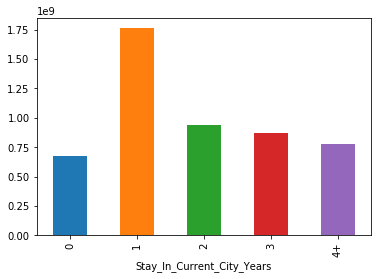

In [20]:
catco=df.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum()
print(catco)
catco.plot(kind='bar')

In [25]:
import numpy
numpy.corrcoef(df['Purchase'], df['Gender'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
df.corr().iloc[:,-1]

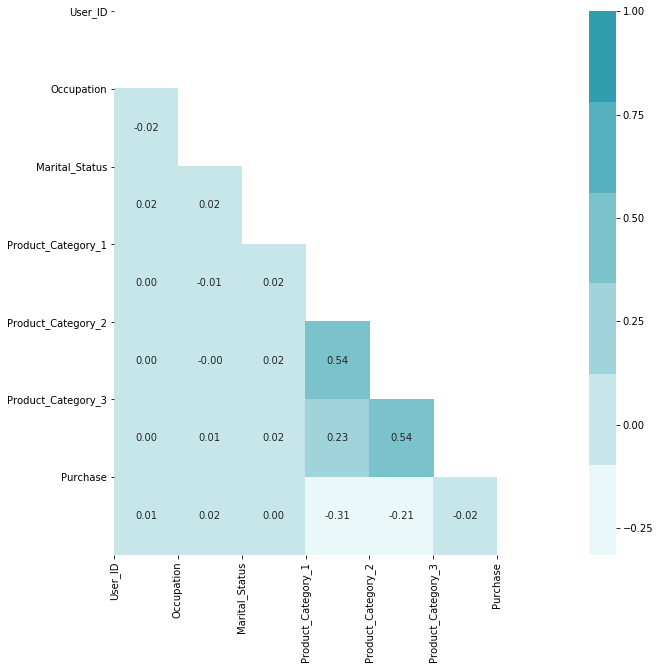

In [26]:
# correlation in consol scrren
#data.corr()

# correlation visualization square
#f,ax = plt.subplots(figsize=(10,5))
#sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.show()

# correlation visualization triangle
corr = df.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sns.light_palette((210, 90, 60), input="husl")
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Text(0,0.5,'Count')

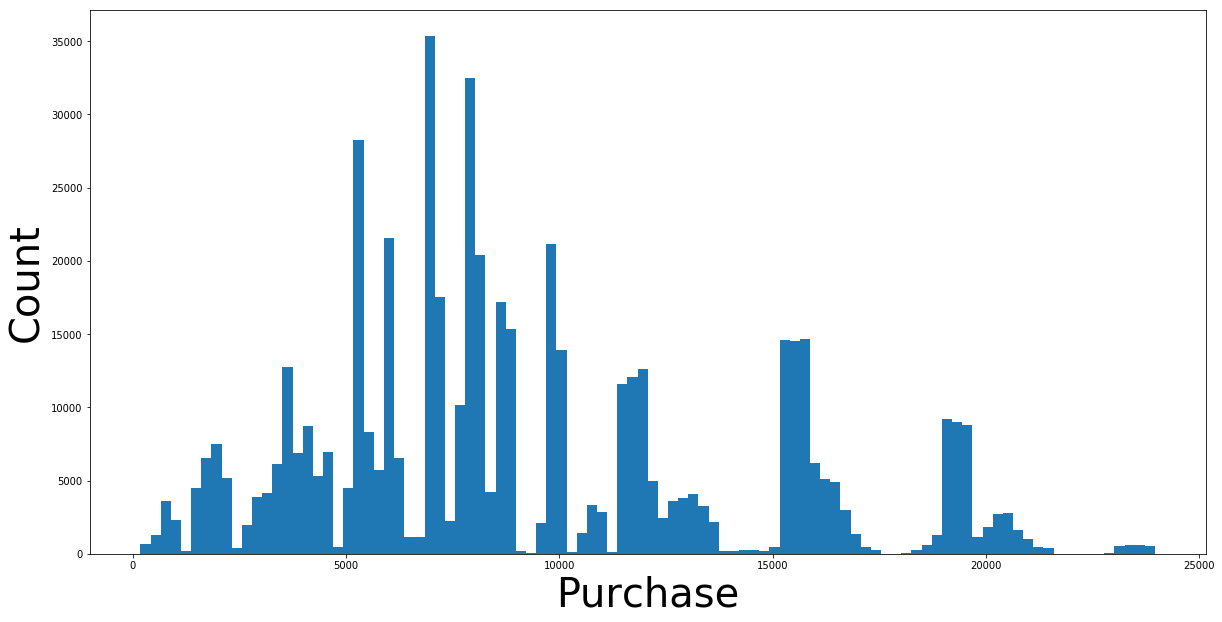

In [23]:
plt.figure(figsize=(20,10))
plt.hist(df['Purchase'],bins=100, alpha=1)
plt.xlabel('Purchase',fontsize=40)
plt.ylabel('Count',fontsize=40)

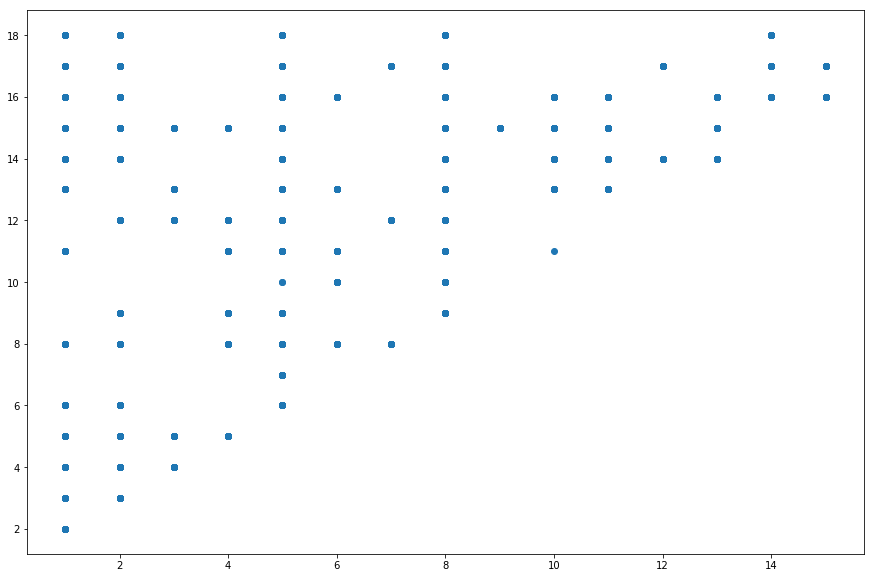

In [44]:
f,ax = plt.subplots(figsize=(15,10))
plt.scatter(df['Product_Category_1'], df['Product_Category_2'])

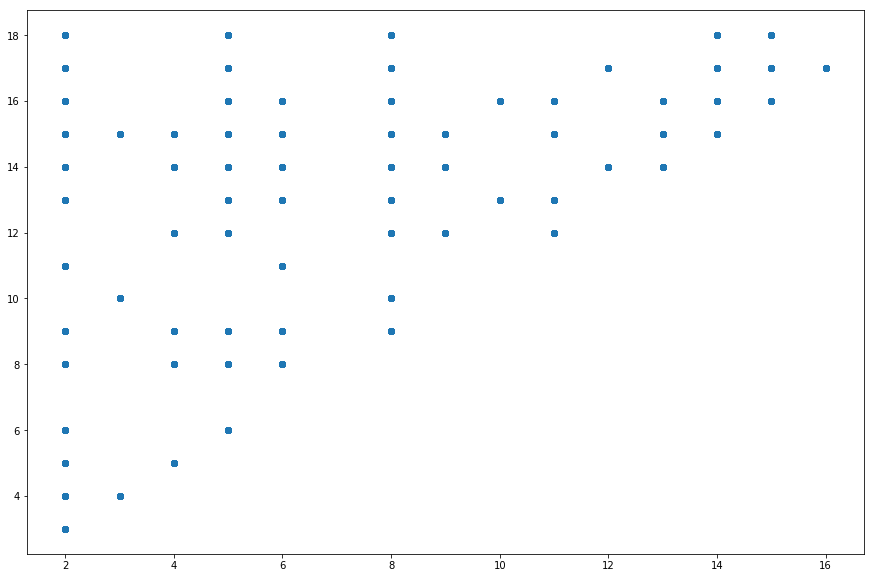

In [45]:
f,ax = plt.subplots(figsize=(15,10))
plt.scatter(df['Product_Category_2'], df['Product_Category_3'])